# ПЕРВИННІ НАЛАШТУВАННЯ

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

In [ ]:
def plot_result(data):
  history_dict = data.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.ylim(0, 1.)
  plt.legend()
  plt.show()

  plt.clf()
  val_acc_values = history_dict['val_accuracy']
  plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
  plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.ylim(0.7, 1.0)
  plt.legend()

In [ ]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [ ]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

# МОДЕЛЬ RNN

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_RNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.5527 - loss: 0.6803 - val_accuracy: 0.6913 - val_loss: 0.5757
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.7915 - loss: 0.4647 - val_accuracy: 0.8208 - val_loss: 0.4161
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.8560 - loss: 0.3522 - val_accuracy: 0.8361 - val_loss: 0.3780
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.8931 - loss: 0.2735 - val_accuracy: 0.8656 - val_loss: 0.3513
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.9144 - loss: 0.2299 - val_accuracy: 0.8503 - val_loss: 0.3894
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.9359 - loss: 0.1714 - val_accuracy: 0.7729 - val_loss: 0.5508
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9551 - loss: 0.1281 - val_accuracy: 0.8553 - val_loss: 0.4574
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9694 - loss: 0.0928 - val_ac

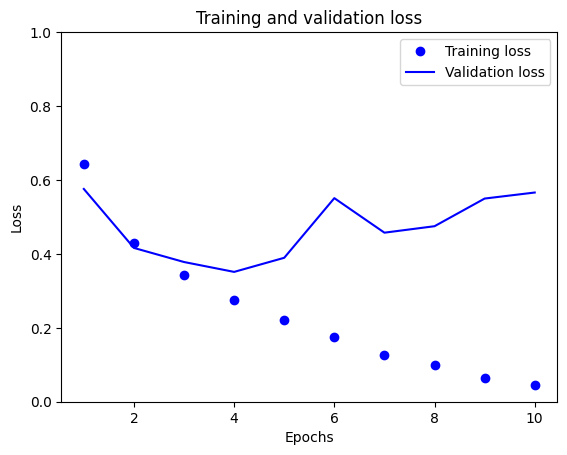

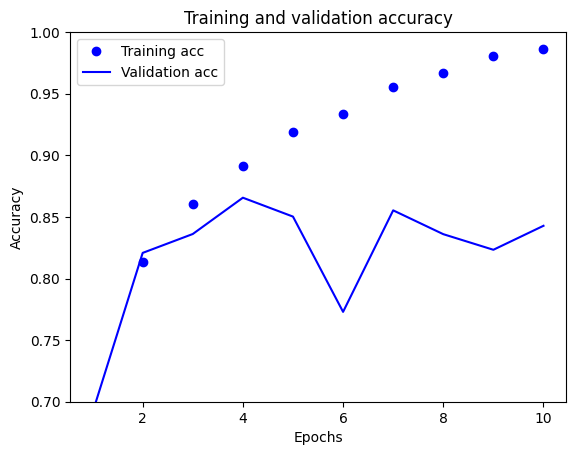

In [ ]:
plot_result(history_RNN)

# МОДЕЛЬ LSTM

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_LSTM = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.5668 - loss: 0.6734 - val_accuracy: 0.6063 - val_loss: 0.6867
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7940 - loss: 0.4524 - val_accuracy: 0.8057 - val_loss: 0.4354
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8565 - loss: 0.3460 - val_accuracy: 0.8071 - val_loss: 0.4360
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8790 - loss: 0.3016 - val_accuracy: 0.8353 - val_loss: 0.4072
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8902 - loss: 0.2816 - val_accuracy: 0.8747 - val_loss: 0.3106
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9068 - loss: 0.2480 - val_accuracy: 0.8620 - val_loss: 0.3311
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9101 - loss: 0.2372 - val_accuracy: 0.8823 - val_loss: 0.2990
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9144 - loss: 0.2204 - val_accu

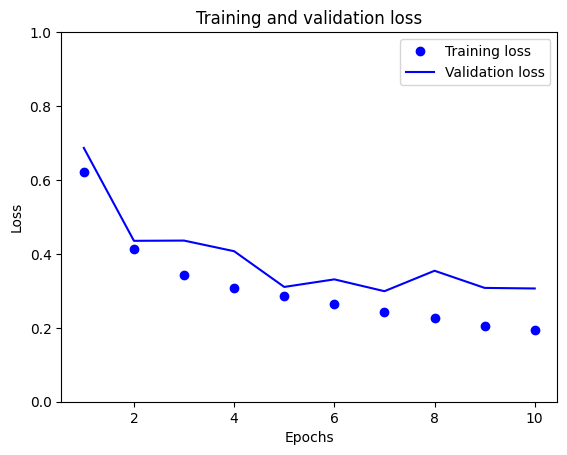

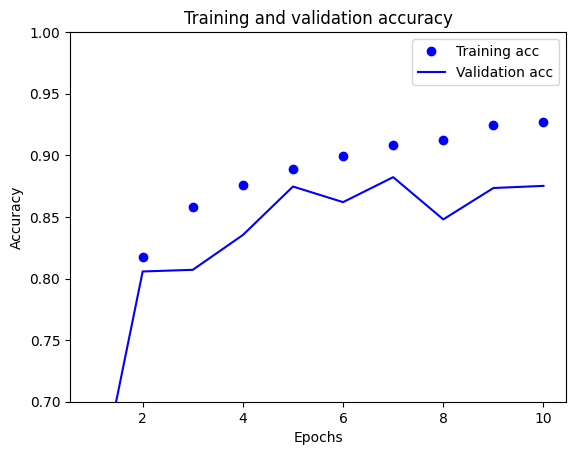

In [ ]:
plot_result(history_LSTM)

# МОДЕЛЬ BRNN

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(SimpleRNN(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_BRNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 324,225 (1.24 MB)

 Trainable params: 324,225 (1.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 46s 308ms/step - accuracy: 0.5786 - loss: 0.6665 - val_accuracy: 0.7845 - val_loss: 0.4704
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 301ms/step - accuracy: 0.8077 - loss: 0.4378 - val_accuracy: 0.7748 - val_loss: 0.4754
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 300ms/step - accuracy: 0.8625 - loss: 0.3395 - val_accuracy: 0.8247 - val_loss: 0.3991
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.8813 - loss: 0.2932 - val_accuracy: 0.8304 - val_loss: 0.3912
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.9006 - loss: 0.2425 - val_accuracy: 0.8279 - val_loss: 0.4082
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 246ms/step - accuracy: 0.9405 - loss: 0.1652 - val_accuracy: 0.8147 - val_loss: 0.4514
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.9557 - loss: 0.1284 - val_accuracy: 0.8473 - val_loss: 0.4546
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 234ms/step - accuracy: 0.9695 - loss: 0

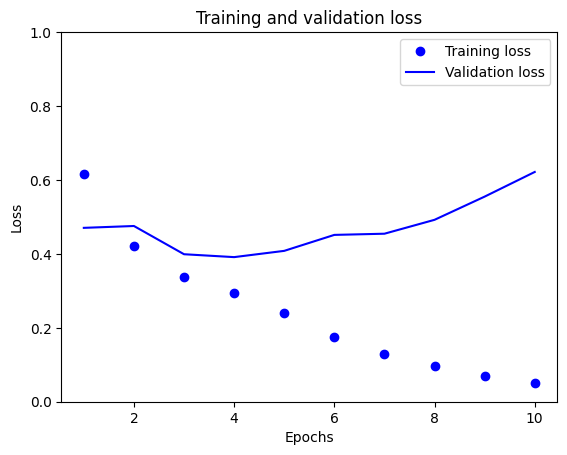

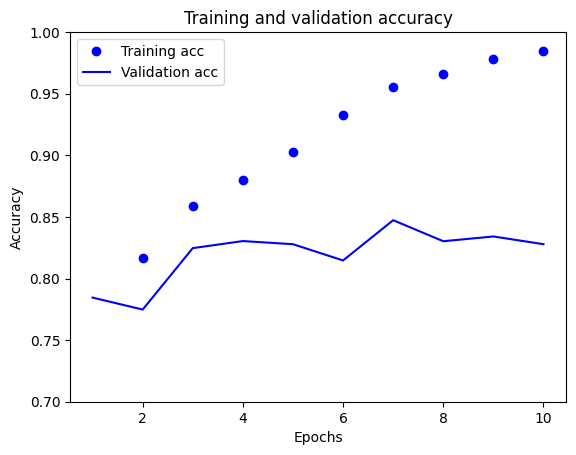

In [ ]:
plot_result(history_BRNN)

# МОДЕЛЬ DRNN

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.build(input_shape=(None, maxlen))
model.summary()

history_DRNN = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 500, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 500, 64)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,537 (1.38 MB)

 Trainable params: 361,537 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.5275 - loss: 0.6856 - val_accuracy: 0.7757 - val_loss: 0.4821
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7900 - loss: 0.4667 - val_accuracy: 0.8359 - val_loss: 0.3806
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.8528 - loss: 0.3600 - val_accuracy: 0.8675 - val_loss: 0.3313
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8799 - loss: 0.3021 - val_accuracy: 0.8565 - val_loss: 0.3298
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9053 - loss: 0.2562 - val_accuracy: 0.8487 - val_loss: 0.3545
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9133 - loss: 0.2226 - val_accuracy: 0.8748 - val_loss: 0.3191
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9186 - loss: 0.2061 - val_accuracy: 0.7909 - val_loss: 0.5196
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9332 - loss: 0.1810 - v

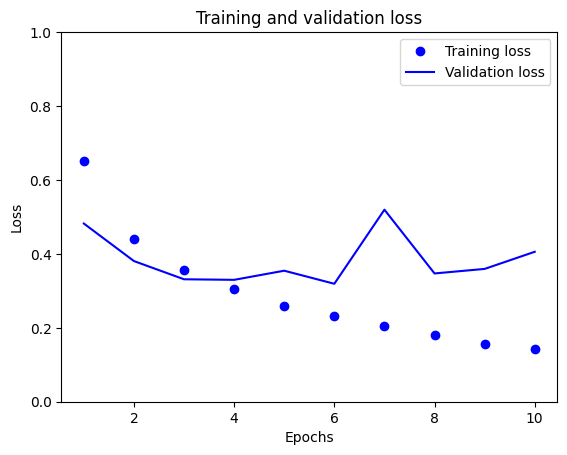

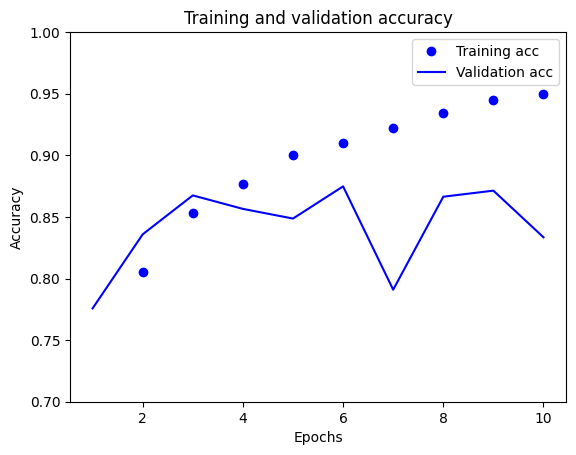

In [ ]:
plot_result(history_DRNN)

# ВИСНОВКИ

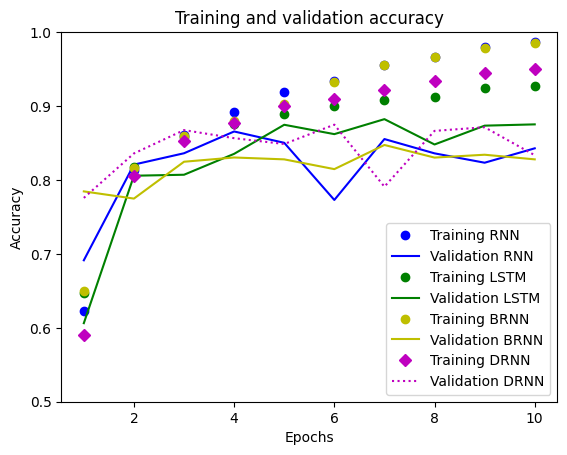

In [ ]:
history_dict_RNN = history_RNN.history
history_dict_LSTM = history_LSTM.history
history_dict_BRNN = history_BRNN.history
history_dict_DRNN = history_DRNN.history

epochs = range(1, len(history_dict_RNN['accuracy']) + 1)

plt.plot(epochs, history_dict_RNN['accuracy'], 'bo', label='Training RNN')
plt.plot(epochs, history_dict_RNN['val_accuracy'], 'b', label='Validation RNN')
plt.plot(epochs, history_dict_LSTM['accuracy'], 'go', label='Training LSTM')
plt.plot(epochs, history_dict_LSTM['val_accuracy'], 'g', label='Validation LSTM')
plt.plot(epochs, history_dict_BRNN['accuracy'], 'yo', label='Training BRNN')
plt.plot(epochs, history_dict_BRNN['val_accuracy'], 'y', label='Validation BRNN')
plt.plot(epochs, history_dict_DRNN['accuracy'], 'mD', label='Training DRNN')
plt.plot(epochs, history_dict_DRNN['val_accuracy'], 'm:', label='Validation DRNN')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

В рамках дослідження роботи різних рекрутних моделей було протестовано кілька основних зберігаючи незмінні гіперпараметри для демонстрації різниці роботи алгоритмів.
Кожна наступна модель вимагала значно більше часу ніж попередня, що виникало з кількості операцій. Тому я відмовився запускати DRNN використовуючи тільки SimpleRNN. Результат є передбачуваним - це призвело б до ще більшого перенавчання.
Аналізуючи по-порядку, проста RNN дала незадовільні результити з очевидним перенавчанням. Точність на тенувальних даних виросла до 0,99 залишивши валідацію далеко позаду.
Модель з використанням LSTM значно покращила ситуацію. Результати тренування і валідації стали значно ближчі, хоча залишились "стрибки". У цьому випадку можна пробувати зменшувати швидкість навчання.
Наступна модель BRNN показала гірші результати. Вона досягла своїх кращих результатів вже на 3 епосі і після цього не покращувалась. Далі відбувалося тільки перенавчання. Це показує, що використання BRNN без LSTM немає ніякого впливу на покращення моделі.
Наступна модель DRNN зібрала у собі всі попередні модифікації. Завдяки цьому вона є найскладнішою моделью з представлених тут і також має найбільшу кількість операцій до виконання.
Як видно з графіку, це зовсім не означає, що DRNN буде однозначно найкращим рішенням для вирішення поставленої задачі.
У висновку, модель RNN з використанням LSTM показала найкращий результат.
